### Nama: Muhammad Arif Septian <br>
### NIM: 2309106046 <br>

#### **Import Libary**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

#### **Membaca Dataset**

In [ ]:
# Baca dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

#### **Cek apakah terdapat missing value, duplicate value, dan outlier**

In [ ]:
# Cek apakah ada missing value
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
# Cek apakah ada data duplikat
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 0


In [ ]:
# Mengambil kolom numerik untuk cek outlier
df_num = df.select_dtypes(include=["number"])

# Menghitung IQR
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

# Boolean mask outlier hanya untuk numerik
outlier_mask = ((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR)))

# Menampilkan jumlah outlier
print("\nJumlah outlier per kolom:")
print(outlier_mask.sum())


Jumlah outlier per kolom:
id                     0
age                    0
hypertension         498
heart_disease        276
avg_glucose_level    627
bmi                  110
stroke               249
dtype: int64


Berdasarkan hasil pemeriksaan kualitas data, diketahui bahwa terdapat missing value pada kolom bmi sebanyak 201 entri, sementara kolom lainnya tidak memiliki nilai kosong. Tidak ditemukan adanya data duplikat sehingga tidak perlu dilakukan penghapusan dan untuk outlier, sejumlah nilai terdeteksi pada beberapa kolom numerik yaitu hypertension (498), heart_disease (276), avg_glucose_level (627), bmi (110), serta stroke (249), di mana pada variabel biner seperti hypertension, heart_disease, dan stroke kemungkinan besar disebabkan oleh ketidakseimbangan distribusi kelas (class imbalance) sehingga masih dianggap valid, sedangkan pada avg_glucose_level dan bmi perlu dipertimbangkan apakah nilai ekstrem tersebut merupakan kesalahan input atau memang data valid yang tetap harus dipertahankan. Langkah selanjutnya adalah melakukan imputasi pada nilai kosong di kolom bmi serta membuang outlier pada kolom avg_glucose_level dan bmi agar distribusi data lebih bersih dan konsisten.

#### **1. Data Cleaning (Handling missing value, Handling outlier)**

In [ ]:
# Imputasi kolom bmi dengan median
df["bmi"] = df["bmi"].fillna(df["bmi"].median())

# Cek jumlah missing value setelah imputasi
print("\nMissing value setelah imputasi:")
print(df.isnull().sum())


Missing value setelah imputasi:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [ ]:
kolom_outlier = ["avg_glucose_level", "bmi"]

# Hitung IQR
Q1 = df[kolom_outlier].quantile(0.25)
Q3 = df[kolom_outlier].quantile(0.75)
IQR = Q3 - Q1

# Mask outlier
outlier_mask = ((df[kolom_outlier] < (Q1 - 1.5 * IQR)) |
                (df[kolom_outlier] > (Q3 + 1.5 * IQR)))

print("Jumlah outlier per kolom sebelum dibuang:")
print(outlier_mask.sum())

# Buang baris yang mengandung outlier
df = df[~outlier_mask.any(axis=1)]

print("\nShape data setelah buang outlier:", df.shape)

Jumlah outlier per kolom sebelum dibuang:
avg_glucose_level    627
bmi                  126
dtype: int64

Shape data setelah buang outlier: (4391, 12)


In [ ]:
# Simpan hasil cleaning ke csv baru
df.to_csv("data-clean-healthcare-dataset-stroke-data.csv", index=False)

Setelah dilakukan imputasi pada kolom bmi, seluruh missing value berhasil ditangani sehingga tidak ada lagi nilai kosong pada data. Selanjutnya, dilakukan penanganan outlier dengan membuang nilai ekstrem pada kolom avg_glucose_level (627 entri) dan bmi (126 entri), sehingga data menjadi lebih bersih dan representatif. Hasilnya, jumlah baris data berkurang menjadi 4.391 entri dengan 12 kolom yang siap digunakan untuk tahap analisis atau pemodelan berikutnya. Langkah selanjutnya adalah melakukan normalisasi atau standarisasi pada kolom numerik seperti age, avg_glucose_level, dan bmi agar semua fitur berada pada skala yang sebanding, sehingga algoritma pemodelan dapat bekerja lebih optimal dan tidak bias terhadap variabel dengan rentang nilai yang lebih besar.

#### **2. Normalisasi/standarisasi kolom numerik**

In [ ]:
# Baca dataset
df = pd.read_csv("data-clean-healthcare-dataset-stroke-data.csv")

In [ ]:
# Standarisasi kolom age
scaler_age = StandardScaler()
df["age"] = scaler_age.fit_transform(df[["age"]])

print("Contoh hasil standarisasi kolom age:")
print(df["age"].head())

Contoh hasil standarisasi kolom age:
0    1.734716
1    1.468544
2    1.246733
3    0.803113
4    1.645992
Name: age, dtype: float64


In [ ]:
# Normalisasi kolom avg_glucose_level
scaler_glucose = MinMaxScaler()
df["avg_glucose_level"] = scaler_glucose.fit_transform(df[["avg_glucose_level"]])

print("\nContoh hasil normalisasi kolom avg_glucose_level:")
print(df["avg_glucose_level"].head())


Contoh hasil normalisasi kolom avg_glucose_level:
0    0.447341
1    0.131825
2    0.345808
3    0.185188
4    0.030380
Name: avg_glucose_level, dtype: float64


In [ ]:
# Normalisasi kolom bmi
scaler_bmi = MinMaxScaler()
df["bmi"] = scaler_bmi.fit_transform(df[["bmi"]])

print("\nContoh hasil normalisasi kolom bmi:")
print(df["bmi"].head())


Contoh hasil normalisasi kolom bmi:
0    0.607450
1    0.461318
2    0.329513
3    0.481375
4    0.369628
Name: bmi, dtype: float64


In [ ]:
df.to_csv("data-scaled-healthcare-dataset-stroke-data.csv", index=False)

Pada tahap normalisasi, dilakukan transformasi pada kolom numerik agar berada pada skala yang sebanding dan tidak menimbulkan bias dalam pemodelan. Kolom age dinormalisasi menggunakan StandardScaler karena distribusinya cenderung mendekati normal, sehingga nilai usia diubah ke skala dengan rata-rata 0 dan standar deviasi 1. Sementara itu, kolom avg_glucose_level dan bmi dinormalisasi menggunakan Min-Max Normalization karena keduanya memiliki variasi nilai yang lebar serta distribusi yang tidak sepenuhnya normal, sehingga lebih sesuai jika disesuaikan ke rentang 0–1 agar lebih stabil. Variabel numerik lain seperti id, hypertension, heart_disease, dan stroke tidak dinormalisasi karena berfungsi sebagai identifier atau merupakan data biner yang sudah berada pada skala yang jelas.

#### **3. Encoding kolom kategorikal**

In [ ]:
df = pd.read_csv("data-scaled-healthcare-dataset-stroke-data.csv")

In [ ]:
# Encode gender (Male=0, Female=1, Other=2)
df["gender"] = df["gender"].map({"Male": 0, "Female": 1, "Other": 2})

# Tampilkan hanya kolom gender dari 5 baris pertama
df[["gender"]].head()


,gender
0,0
1,0
2,1
3,1
4,1


In [ ]:
# Encode ever_married (No=0, Yes=1)
df["ever_married"] = df["ever_married"].map({"No": 0, "Yes": 1})

df["ever_married"].head()

,ever_married
0,1
1,1
2,0
3,1
4,1


In [ ]:
# Encode work_type (Private=0, Self-employed=1, Govt_job=2, children=3, Never_worked=4)
df["work_type"] = df["work_type"].map({
    "Private": 0,
    "Self-employed": 1,
    "Govt_job": 2,
    "children": 3,
    "Never_worked": 4
})

print(df["work_type"].unique())

[0 2 1 3 4]


In [ ]:
# Encode Residence_type (Urban=0, Rural=1)
df["Residence_type"] = df["Residence_type"].map({"Urban": 0, "Rural": 1})

df["Residence_type"].head()

,Residence_type
0,1
1,1
2,0
3,1
4,0


In [ ]:
# Encode smoking_status (never smoked=0, formerly smoked=1, smokes=2, Unknown=3)
df["smoking_status"] = df["smoking_status"].map({
    "never smoked": 0,
    "formerly smoked": 1,
    "smokes": 2,
    "Unknown": 3
})

df["smoking_status"].unique()

array([0, 3, 2, 1])

In [ ]:
# Simpan hasil encode ke file baru
df.to_csv("data-encoded-healthcare-dataset-stroke-data.csv", index=False)
print("Encoding selesai dan file disimpan.")

Encoding selesai dan file disimpan.


Proses encoding dilakukan pada seluruh kolom kategorikal agar dapat diubah menjadi bentuk numerik dan digunakan dalam pemodelan machine learning. Kolom gender dikonversi menjadi Male = 0, Female = 1, dan Other = 2. Kolom ever_married menjadi No = 0 dan Yes = 1. Kolom work_type menjadi Private = 0, Self-employed = 1, Govt_job = 2, children = 3, dan Never_worked = 4. Kolom Residence_type menjadi Urban = 0 dan Rural = 1. Kolom smoking_status menjadi never smoked = 0, formerly smoked = 1, smokes = 2, dan Unknown = 3. Perubahan ke bentuk numerik ini diperlukan karena algoritma machine learning umumnya hanya dapat mengolah data dalam format angka sehingga dengan encoding, variabel kategorikal dapat dipahami model tanpa menghilangkan informasi yang terkandung di dalamnya.

#### **4. Feature engineering**

In [ ]:
df = pd.read_csv("data-encoded-healthcare-dataset-stroke-data.csv")

In [ ]:
# Membuat kategori berdasarkan hipertensi
df['Hypertension_Status'] = df['hypertension'].map({0: 'No', 1: 'Yes'})

# Lihat hasil
df[['hypertension', 'Hypertension_Status']].head()


,hypertension,Hypertension_Status
0,0,No
1,1,Yes
2,0,No
3,0,No
4,0,No


In [ ]:
# Membuat kategori berdasarkan penyakit jantung
df['Heart_Disease_Status'] = df['heart_disease'].map({0: 'No', 1: 'Yes'})

# Lihat hasil
df[['heart_disease', 'Heart_Disease_Status']].head()


,heart_disease,Heart_Disease_Status
0,1,Yes
1,1,Yes
2,0,No
3,0,No
4,0,No


In [ ]:
# Simpan dataset hasil feature engineering
df.to_csv("data-feature-engineered-healthcare-dataset-stroke-data.csv", index=False)
print("Dataset dengan feature engineering sudah disimpan.")

Dataset dengan feature engineering sudah disimpan.


Proses feature engineering pada kolom hypertension dan heart_disease dilakukan dengan menambahkan kolom kategori Hypertension_Status dan Heart_Disease_Status yang mengubah nilai numerik 0/1 menjadi “No”/“Yes”. Perubahan ini bertujuan untuk mempermudah interpretasi dan visualisasi data saat analisis eksplorasi, tanpa mengubah nilai asli yang tetap bisa digunakan dalam pemodelan machine learning.

### POSTTEST4 <br>
- Muhammad Arif Septian <br>
- 2309106046

#### **5. Splitting data ke dalam data training & data testing**

### Import Libary

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [42]:
# Baca CSV
df = pd.read_csv("data-feature-engineered-healthcare-dataset-stroke-data.csv")

In [43]:
# target kolom 'stroke'
target = 'stroke'

# Fitur (X) = semua kolom kecuali target
X = df.drop(target, axis=1)
y = df[target]

# Split data: 80% training, 20% testing
# stratify=y supaya proporsi target tetap sama di train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% data untuk testing
    random_state=42,     # supaya hasil bisa direproduksi
    stratify=y           # menjaga proporsi kelas target
)

# Cek ukuran data
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test :", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test :", y_test.shape)

Ukuran X_train: (3512, 13)
Ukuran X_test : (879, 13)
Ukuran y_train: (3512,)
Ukuran y_test : (879,)


Pemisahan data menjadi training dan testing dilakukan agar model machine learning dapat belajar dari sebagian data (training) dan dievaluasi pada data yang belum pernah dilihat (testing), sehingga performa model lebih realistis dan tidak bias. Penggunaan stratify memastikan proporsi kelas target tetap seimbang di kedua set, mencegah model terlatih hanya pada kelas mayoritas. Pembagian ini juga memungkinkan validasi performa model sebelum digunakan untuk prediksi pada data baru.

In [44]:
# --- Pisahkan kolom numerik dan kategorikal ---
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(exclude=['int64', 'float64']).columns

# Standarisasi hanya kolom numerik
scaler = StandardScaler()
X_train_scaled_num = scaler.fit_transform(X_train[num_cols])
X_test_scaled_num = scaler.transform(X_test[num_cols])

# Kembalikan ke bentuk DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled_num, columns=num_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled_num, columns=num_cols, index=X_test.index)

# Gabungkan kembali dengan kolom kategorikal tanpa di-scale
X_train_final = pd.concat([X_train_scaled, X_train[cat_cols]], axis=1)
X_test_final = pd.concat([X_test_scaled, X_test[cat_cols]], axis=1)

# Ubah kolom kategorikal jadi numerik
X_train_final = pd.get_dummies(X_train_final, drop_first=True)
X_test_final = pd.get_dummies(X_test_final, drop_first=True)

X_test_final = X_test_final.reindex(columns=X_train_final.columns, fill_value=0)


#### Implementasi SVM

In [45]:
# Model SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_final, y_train)
y_pred_svm = svm_model.predict(X_test_final)

Pemilihan SVM (Support Vector Machine) dilakukan karena label yang diprediksi adalah stroke, yaitu kasus biner (0 = tidak stroke, 1 = stroke) yang membutuhkan pemisahan kelas secara tegas. SVM sangat cocok untuk jenis masalah ini karena algoritma ini berfokus mencari hyperplane terbaik yang memisahkan dua kelas dengan margin maksimal, sehingga dapat mendeteksi perbedaan halus antara individu yang berisiko dan tidak berisiko stroke. Selain itu, kernel RBF digunakan karena mampu menangani pola hubungan yang non-linear, yang umum terjadi pada data medis di mana faktor-faktor penyebab stroke tidak selalu memiliki hubungan linier satu sama lain. Dengan kata lain, SVM dipilih karena kemampuannya memberikan klasifikasi yang presisi dan robust pada dataset biner dengan pola kompleks seperti prediksi stroke.

#### Implementasi Random Forest

In [46]:
# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None)
rf_model.fit(X_train_final, y_train)
y_pred_rf = rf_model.predict(X_test_final)

Pemilihan Random Forest dilakukan karena model ini mampu menangani data dengan kombinasi fitur numerik dan kategorikal secara alami tanpa perlu asumsi linearitas. Dalam kasus prediksi stroke, hubungan antarvariabel seperti tekanan darah, usia, riwayat penyakit, dan gaya hidup sering kali bersifat kompleks serta melibatkan interaksi antarfitur. Random Forest, yang merupakan kumpulan dari banyak pohon keputusan (ensemble of decision trees), dapat menangkap hubungan non-linear dan interaksi tersebut dengan baik. Selain itu, model ini tahan terhadap overfitting, memberikan interpretasi melalui fitur penting (feature importance), serta cenderung memiliki performa stabil meskipun terdapat data yang tidak seimbang seperti kasus stroke yang biasanya lebih jarang dibanding non-stroke.

### A2. Hasil prediksi harus dievaluasi masing-masing:

#### Evaluasi Model SVM

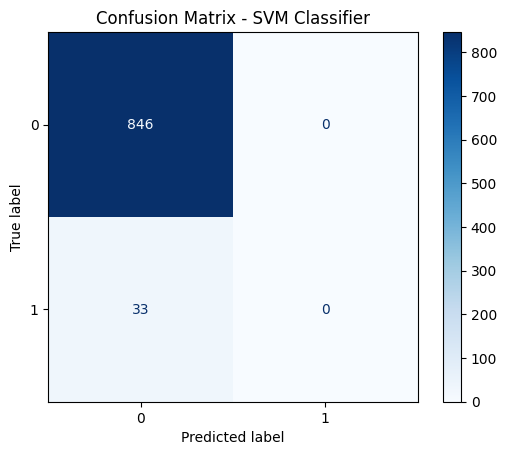

=== Evaluasi: SVM Classifier ===
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       846
           1       0.00      0.00      0.00        33

    accuracy                           0.96       879
   macro avg       0.48      0.50      0.49       879
weighted avg       0.93      0.96      0.94       879



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Menampilkan confusion Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM Classifier")
plt.show()

# Menampilkan Klasifikasi Report
print("=== Evaluasi: SVM Classifier ===")
print(classification_report(y_test, y_pred_svm))

Hasil evaluasi menunjukkan bahwa model SVM Classifier memiliki akurasi tinggi sebesar 96%, namun performanya tidak seimbang karena hanya mampu mengenali kelas non-stroke (label 0) dengan sempurna, sedangkan kelas stroke (label 1) sama sekali tidak terdeteksi. Hal ini terlihat dari confusion matrix yang memperlihatkan 33 kasus stroke semuanya salah diklasifikasikan sebagai non-stroke. Kondisi ini biasanya terjadi karena ketidakseimbangan data (imbalanced dataset), di mana jumlah data non-stroke jauh lebih banyak daripada stroke, sehingga model cenderung “bermain aman” dengan selalu memprediksi kelas mayoritas. Akibatnya, meskipun akurasi terlihat tinggi, recall dan precision untuk kelas stroke = 0, yang berarti model gagal mendeteksi kasus stroke secara efektif.

#### Evaluasi Model Random Forest

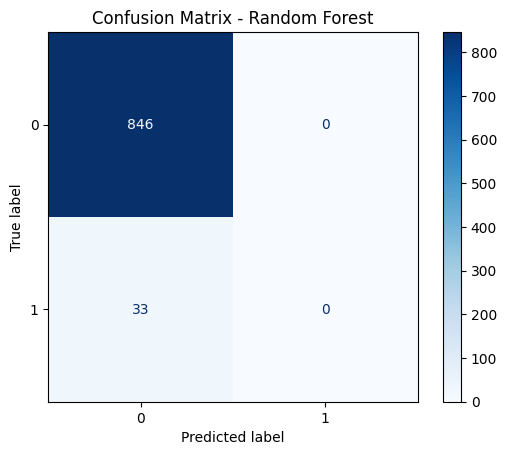

=== Evaluasi: Random Forest ===
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       846
           1       0.00      0.00      0.00        33

    accuracy                           0.96       879
   macro avg       0.48      0.50      0.49       879
weighted avg       0.93      0.96      0.94       879



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Menampilkan confusion Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Menampilkan Klasifikasi Report
print("=== Evaluasi: Random Forest ===")
print(classification_report(y_test, y_pred_rf))

Hasil evaluasi model Random Forest menunjukkan pola yang sama seperti SVM, dengan akurasi tinggi yaitu 96%, namun tidak mampu mendeteksi satupun kasus stroke (label 1). Berdasarkan confusion matrix, semua data stroke diklasifikasikan sebagai non-stroke (label 0). Hal ini menandakan bahwa model terlalu bias terhadap kelas mayoritas akibat ketidakseimbangan data, di mana jumlah data non-stroke jauh lebih dominan. Meskipun Random Forest biasanya lebih tangguh terhadap noise dan outlier, performa model tetap menurun jika proporsi kelas sangat timpang. Akibatnya, meskipun akurasi terlihat baik, nilai precision, recall, dan f1-score untuk kelas stroke bernilai 0, menandakan bahwa model gagal mengidentifikasi pasien yang berisiko stroke secara benar.

### Buat plot untuk hasil prediksi-nya

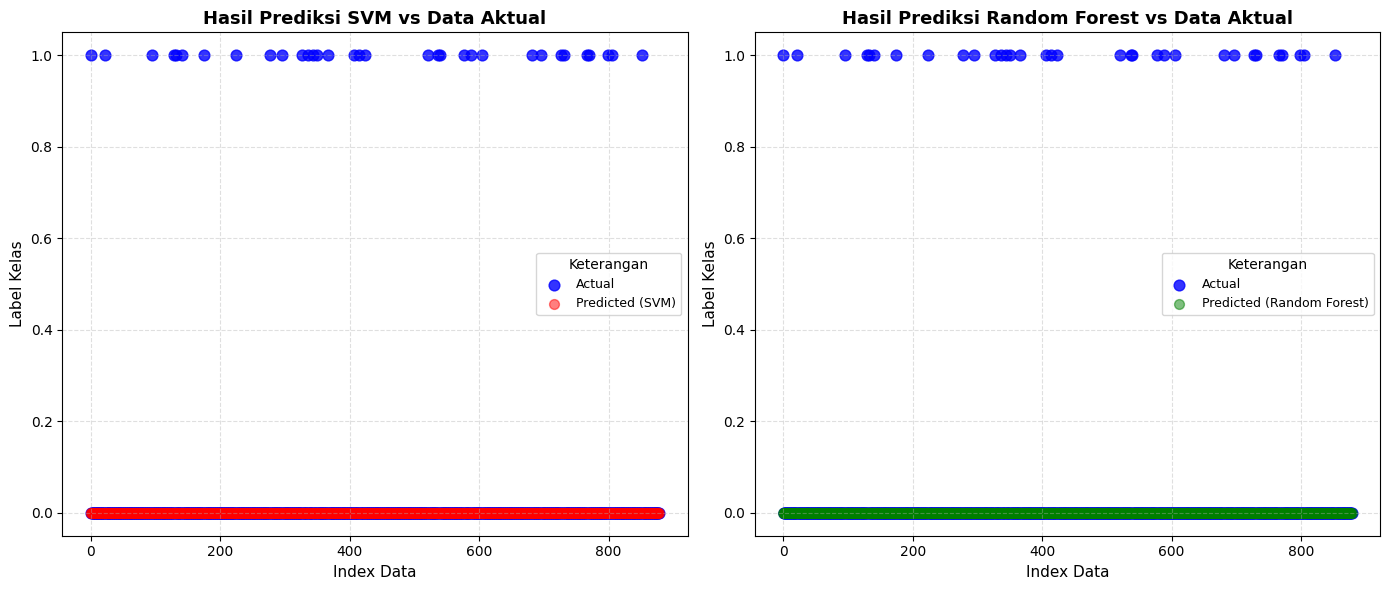

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Membuat plot untuk hasil prediksi svm
axes[0].scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.8, s=60)
axes[0].scatter(range(len(y_test)), y_pred_svm, color='red', label='Predicted (SVM)', alpha=0.5, s=50)
axes[0].set_title("Hasil Prediksi SVM vs Data Aktual", fontsize=13, fontweight='bold')
axes[0].set_xlabel("Index Data", fontsize=11)
axes[0].set_ylabel("Label Kelas", fontsize=11)
axes[0].legend(title="Keterangan", fontsize=9)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Membuat plot untuk hasil prediksi random forest
axes[1].scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.8, s=60)
axes[1].scatter(range(len(y_test)), y_pred_rf, color='green', label='Predicted (Random Forest)', alpha=0.5, s=50)
axes[1].set_title("Hasil Prediksi Random Forest vs Data Aktual", fontsize=13, fontweight='bold')
axes[1].set_xlabel("Index Data", fontsize=11)
axes[1].set_ylabel("Label Kelas", fontsize=11)
axes[1].legend(title="Keterangan", fontsize=9)
axes[1].grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


Dari plot tersebut, terlihat bahwa kedua model, SVM dan Random Forest, sama-sama mengalami kesulitan dalam memprediksi kelas minoritas (label 1) karena hampir seluruh prediksi berada di kelas mayoritas (label 0), sehingga meskipun label 0 terprediksi dengan benar, label 1 hampir tidak terdeteksi; hal ini mengindikasikan adanya masalah ketidakseimbangan kelas pada dataset yang menyebabkan kedua model bias ke kelas mayoritas, meskipun akurasi keseluruhan terlihat tinggi, performa untuk kelas minoritas sangat rendah.